# MNIST : le "Hello World" du machine learning 

La base de données MNIST (pour Modified National Institute of Technology ) est une base de données de chiffres écrits à la main, en noir et blanc. Elle contient 70 000 images de ces chiffres, généralement réparties en 60 000 données d'entrainement et 10 000 données de test. Ces images sont de taille 28*28 pixels. 

C'est le BA-ba du machine learning. Il est assez facile d'obtenir de bons scores avec des algorithmes simplistes, ce qui en fait un problème idéal pour commencer en machine learning et s'habituer au workflow. 




In [22]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Visualisation des données 

Le dataset se compose en 4 éléments : 


```
train_images , train_labels, test_images, test_labels 
```

Ces 4 éléments sont essentiels : 
- Pour entrainer notre modèle, nous avons besoin de données et de leurs annotations (les labels)
- Pour tester si notre modèle est compétent, nous avons besoin de données 'neuves', que le modèle n'a encore jamais rencontré. 

Une fois le dataset chargé, on peut jeter un coup d'oeil aux données. Pour ça, on peut visuer quelques éléments du jeu d'entrainement : 



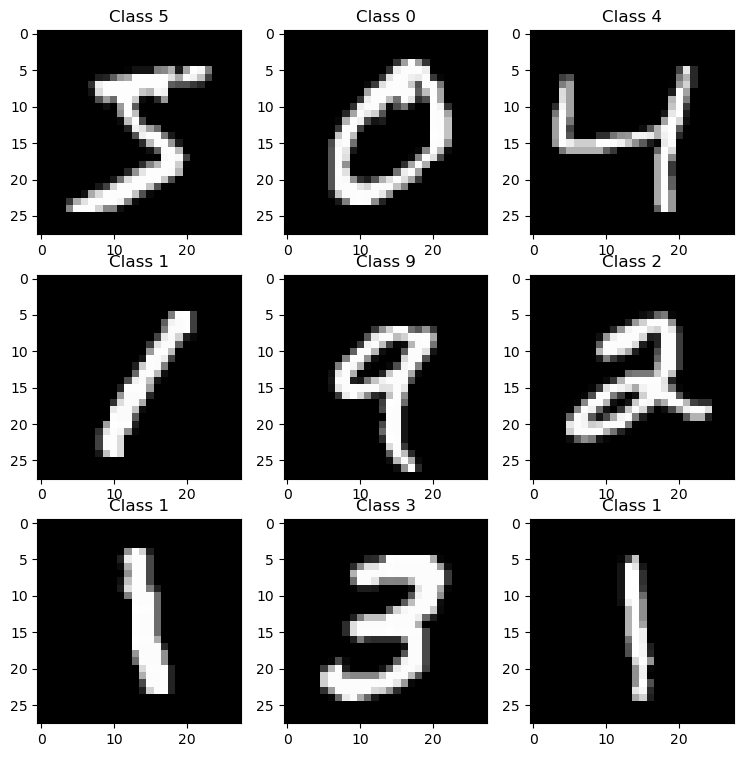

In [23]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_images[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(train_labels[i]))

## Exploration des données 

Il est toujours conseillé d'explorer un dataset avant de chercher à l'exploiter. Pour l'utiliser, il faut le comprendre. Attelons nous donc à comprendre ce qu'est exactement le dataset MNIST. 

### formes et formats 

Sous quel format nous sont fournis les données ? Quelle est la répartition des données dans le dataset ? Pour connaitre ces informations, nous pouvons explorer les différents éléments dont nous disposons. 

Pour connaitre le type de structure : 


```
type(train_images)
```

La forme des données : 


```
train_images.shape 
len(train_images)
# fonctionne pour des listes, des tableaux numpy, etc... 

```

### Train & test 
Il peut être intéressant de voir si les données sont bien réparties. On parle ici de vérifier que les données d'entrainement et de test sont bien uniforméments réparties, et ne comportent pas de biais qui viendraient fausser les résultats recherchés. 

On peut par exemple checker la répartition de chacun des chiffres dans les deux différents jeux de données (entrainement et test )

 Type of data structure for the images : <class 'numpy.ndarray'>
 Type of data structure for the labels : <class 'numpy.ndarray'>
 Shape of the train images encoded as numpy arrays :  (60000, 28, 28)
 Length of the associated labels : 60000
 Shape of the test images encoded as numpy arrays :  (10000, 28, 28)
 Length of the associated labels : 10000
 Shape of an image : (28, 28)


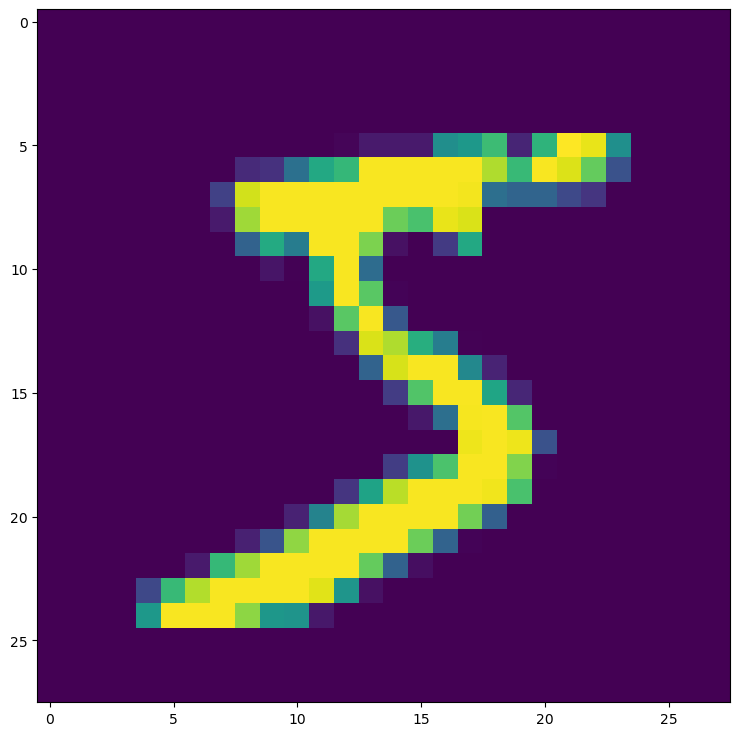

In [24]:
from math import sqrt

print(" Type of data structure for the images : {}".format(type(train_images)))
print(" Type of data structure for the labels : {}".format(type(train_labels)))

print(" Shape of the train images encoded as numpy arrays :  {}".format(train_images.shape))
print(" Length of the associated labels : {}".format(len(train_labels)))

print(" Shape of the test images encoded as numpy arrays :  {}".format(test_images.shape))
print(" Length of the associated labels : {}".format(len(test_labels)))

print(" Shape of an image : {}".format(train_images[0].shape))
# print(" Example image : \n {}".format(train_images[0]))
imsize = int(sqrt(train_images[0].size))
plt.imshow(train_images[0].reshape((imsize, imsize)))
plt.show()

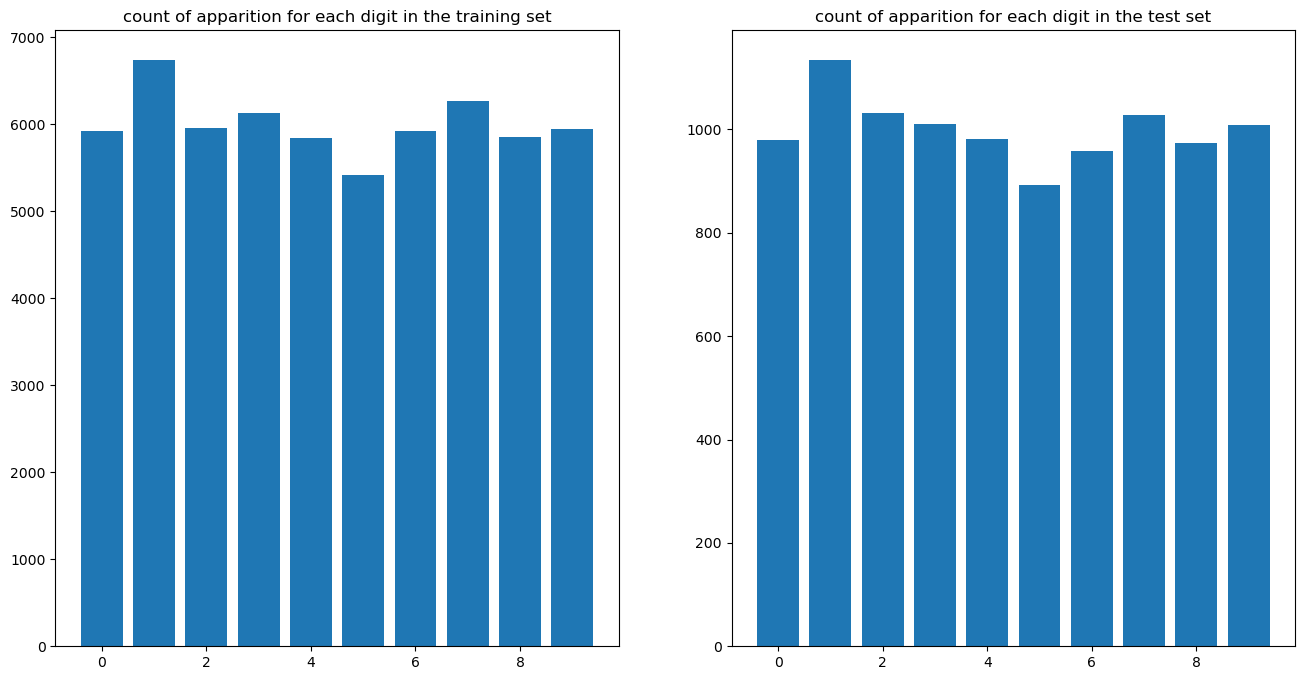

In [26]:
train_counts=[]
test_counts=[]
for i in range(0, 10):
  train_counts.append(len([k for k in train_labels if k == i]))
  test_counts.append(len([k for k in test_labels if k == i]))
  
plt.rcParams['figure.figsize'] = (16, 8) # Make the figures a bit bigger
fig,(ax1, ax2,) = plt.subplots(1, 2)

x = range(0, 10)
ax1.bar(x, train_counts)
ax1.set_title("count of apparition for each digit in the training set")

ax2.bar(x, test_counts)
ax2.set_title("count of apparition for each digit in the test set")

plt.show()

## Preformattage : préparer les données 

Les données sont bien réparties, on peut maintenant les préparer à rentrer dans notre modèle ! 
Une image est pour le moment un numpy array de taille 28*28. Ces array contiennent des valeurs de 0 à 255. Ce format est pratique pour l'affichage, mais pas pour le traitement de données : on préfère toujours se ramener à des valeurs entre 0 et 1. On va donc procéder à une remise à l'échelle. 

Le format des données peut aussi être simplifié : au lieu de posséder une matrice d'information pour une image, on peut en faire un array simple, de longueur 28*28. 



In [27]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255



Quel format utiliser pour les labels ? 

Notre souhait est de mettre au point un modèle capable de classifier une image dans une des 10 classes disponibles: les 10 chiffres de l'alphabet numérique. 
Pour celà, le plus pratique est d'utiliser des bins : une représentation dans un tableau binaire de l'appartenance d'une donnée à une classe. Dit simplement : nous utilisons un tableau tel que tableau[i] vaut 1 si la donnée associée au tableau est i, et 0 sinon.  

L'appartenance d'une image à la classe 5 se traduirait par le label suivant : [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

Il existe une fonction dans keras qui permet de faire cette transformation : 

```
to_categorical
```



In [28]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Un modèle, mon royaume pour un modèle ! 

## Comment c'est qu'on fait un modèle ? 

Rappel : un modèle, c'est ... 

![worfklow](https://docs.google.com/uc?export=download&id=17yxjq1_1kiddBFzeFIqyEB_mk68X3fq4)

En entrée : des datas - ici, des images de taille 28*28

En sortie : des labels - du même format que ceux utilisés pour l'entrainement. 

En sortie, il devra nous fournir un tableau de longueur 10 et comportant des valeurs entre 0 et 1, qui seront les probabilités que la donnée en entrée soit dans la classe appropriée ! 

Mais ce n'est pas tout : 
- Un réseau de neurones comporte un certain nombre de ces neurones, et c'est à nous de décider combien ! 
- C'est aussi ici que l'on décide du nombre de couches intermédiaires entre la couche d'entrée et de sortie : 100, 10, 1, 0 ? 
- N'oublions pas les fonctions d'activation de ces neurones : quelle est la fonction non linéaire que nous allons appliquer en sortie des combinaisons linéaires des poids et inputs ? 

Voyons un premier exemple ci-dessous :


In [29]:
from keras import models 
from keras import layers 

network = models.Sequential()
network.add(layers.Dense(32,activation = 'relu', input_shape = (28*28,)))
network.add(layers.Dense(10,activation='softmax'))

Faisons un peu de lecture du modèle ci-dessus : 

```
network = models.Sequential()
```
Cette ligne déclare que la variable network est un modèle qui pourra accueillir des couches. 

```
network.add(layers.Dense(32,activation = 'relu', input_shape = (28*28,)))
```

C'est notre premier ajout de couches ! Il y a quatres éléments à retenir ici :
- le type de couche que nous utilisons est une couche Dense (layers.Dense). C'est la couche la plus simple : tous les neurones de la couche seront connectés à tous les neurones de la couche suivante ! 
![dense network](https://docs.google.com/uc?export=download&id=1k8sInTooI-qTVfo8eoTbV4LRKv4kuRuL)

- Le nombre de neurones : pour cette première couche, nous avons décidé d'en utiliser 32. Pourquoi 32 ? Eh bien, il n'y a pas vraiment de raison particulière, il s'agit d'un compromis ! On utilise généralement des puissances de 2 pour des raisons matérielles (question d'optimisation d'accès mémoire). Ensuite, plus on ajoute de neurones, plus notre modèle sera lourd, plus il sera computationnellement lent de l'entrainer ! A l'inverse, en mettre trop peu nous amènerait à avoir un modèle trop peu capable...  C'est ici l'expérience qui nous fait désigner le réseau de la sorte ! 

- l'activation : nous avons utilisé la fonction 'relu' pour l'activation. Mais qu'est-ce qu'un 'relu' ? RELU veut dire REctified Linear Unit, cette fonction correspond à la fonction unité sur la tranche positive des réels et à la fonction nulle sur la tranche négative des réels. 
![RELU](https://docs.google.com/uc?export=download&id=1wA90EN0WlZD6z16_YRaQqaTeUmSgtyB3)

- La forme de l'input ! Il faut renseigner la forme des données qui vont être envoyées dans le réseau. Ici, 28*28 correspond à la taille d'une de nos données. 

Passons à la ligne suivante. 

```
network.add(layers.Dense(10,activation='softmax'))
```

Ceci est notre dernière couche, la couche de sortie. Elle est composée : 

- du type de couche. Nous utilisons encore une couche Dense ici.
- du nombre de neurones. Ce nombre revêt un intérêt particulier, puisqu'il définit la taille de l'output. Puisque nous souhaitons un tableau à 10 valeurs. C'est donc 10 neurones dont nous aurons besoin. 
- de l'activation. Nous souhaitons obtenir des valeurs entre 0 et 1. Ici, l'activation RELU n'est plus suffisante : elle peut produire des valeurs au dessus de 1 ... On utilise donc une autre activation, qui borne les valeurs dans l'intervalle (0,1)

![Softmax](https://docs.google.com/uc?export=download&id=1xDReDAU1jWoDc_eCV7HAXZcm0XPnKOA6)

Pas de couches intermédiaires, nous gardons le réseau le plus simple possible pour limiter les complications. 

Et voilà, le réseau est prêt à être utilisé ! 

On peut faire une visualisation de ce dernier avec la commande `summary`

In [30]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


## A quel point le modèle est-il mauvais ? 

Rappelons-nous le workflow de l'entrainement : 


![Softmax](https://docs.google.com/uc?export=download&id=19Ma0VMeHUJQiwhJcHi5ElR-VJffWg2Rs)

Il nous reste pour entrainer notre modèle à définir : 

- La loss function, ou fonction de perte : la fonction qui va nous permettre de définir une distance entre deux labels : le label prédit et le label attendu. Pour des labels sous la forme 'categorical' tels qu'on a actuellement, nous utiliserons une fonction qui est déjà dans keras : 'categorical_crossentropy'

- Il existe plusieurs optimizers qui permettent de remonter l'information dans les poids (ou de parcourir l'espace des solutions et de rechercher un minimum global dans cet espace). Pour cet exemple, nous utiliserons 'rmsprop', qui sera explécité une autre fois. 

- Enfin, on peut rajouter des métriques que l'on peut suivre durant l'entrainement pour s'informer de son bon déroulement - la précision, par exemple.  

In [31]:
network.compile(optimizer='rmsprop',
                loss = 'categorical_crossentropy',
                metrics =['accuracy'])

## S'entrainer pour mieux régner 

Tout est prêt ! Nous allons pouvoir entrainer notre modèle. 

Le principe de l'entrainement est le suivant : un ensemble de données (qu'on appelle un batch) est présenté au modèle. Ces données subissent les transformations inhérentes à leur passage dans les couches du modèle, jusqu'à l'output. Ensuite, de ces outputs, on calcule le loss score, qui correspond à la distance des labels prédits de l'ensemble du batch aux labels attendus de ce dernier. 

L'optimizer modifie alors les poids en fonction de ce loss score, et un nouveau batch est présenté au modèle pour répéter cette opération. 

Une fois l'ensemble des données présentées au modèle, on peut procéder à une phase de test de celui-ci. 

Mais pour que l'entrainement soit efficace, on peut répéter ces opérations ! Et donc, présenter plusieurs fois au modèle l'ensemble des données. On appellera la présentation de l'ensemble des données au modèle une epoch. On peut programmer plusieurs epochs et observer si présenter plusieurs fois le jeu de données au modèle améliore ses capacités ! 

In [32]:
epochs = 10
batch_size = 128
history = network.fit(train_images,
                      train_labels,
                      epochs=epochs,
                      batch_size=batch_size)

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.4869 - accuracy: 0.8680
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2436 - accuracy: 0.9306
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1989 - accuracy: 0.9427
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1699 - accuracy: 0.9510
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1500 - accuracy: 0.9569
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1354 - accuracy: 0.9612
Epoch 7/10
469/469 [==============================] - 5s 12ms/step - loss: 0.1243 - accuracy: 0.9636
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1152 - accuracy: 0.9666
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1074 - accuracy: 0.9688
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1020 - accuracy: 0.970

Et voilà, le réseau est entrainé ! 

Qu'observe-t-on ? 
- la loss affichée semble baisser au fur et à mesure des epochs 
- l'accuracy (précision) semble elle augmenter, le réseau apprend ! 
- à la dernière epoch, le réseau nous affiche une précision de 0.9850, soit 98,5% ! 

Mais ces données brutes sont assez peu exploitables. Commençons par essayer de nous représenter les avancées durant l'entrainement : nous avons gardé un historique des différentes étapes ! 

Cet historique est un dictionnaire contenant les scores de loss et d'acc durant les différentes étapes. On l'exploite comme ci-dessous pour en tirer des visualisations : 

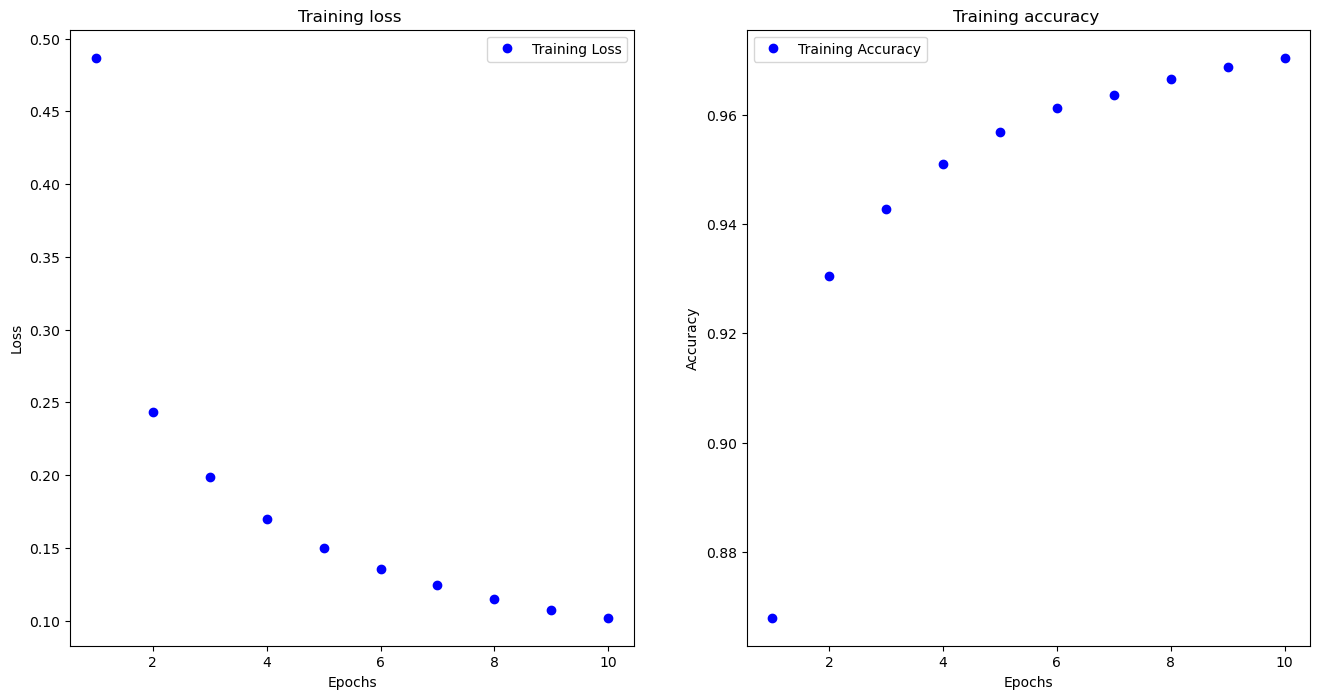

In [33]:
history_dict = history.history 
loss_values = history_dict['loss']
acc_values = history_dict['accuracy']
plt.rcParams['figure.figsize'] = (16,8) # Make the figures a bit bigger
fig,(ax1,ax2,) = plt.subplots(1,2)

x = range(1,epochs+1)
ax1.plot(x,loss_values,'bo',label='Training Loss')
ax1.set_title('Training loss ')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()


ax2.plot(x,acc_values,'bo',label='Training Accuracy')
ax2.set_title('Training accuracy ')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

## Inférer pour tester

L'inférence, c'est le fait d'utiliser le modèle pour en extraire de l'information.

Il nous reste encore le test set, que nous n'avons pas encore présenté au modèle. Ce sont donc, pour le modèle, des nouvelles données auxquelles il n'a jamais été confronté. 

Nous possédons les labels associés aux données de ce set, mais nous n'allons pas les présenter au modèle - au contraire, nous ne lui fournissons que les données , et ce dernier infèrera les labels associés ! 

A nous de comparer ces labels prédits à ceux que nous possédons... 

Pas de panique, il existe une fonction pour ça ! Elle va calculer directement, sur le jeu de données test, la distance moyenne entre les labels prédits et ceux prévus, avec la fonction de perte que l'on a renseigné plus tôt ... 

In [34]:
test_loss, test_acc = network.evaluate(test_images,test_labels)
print('accuracy on test set : {}'.format(test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.1220 - accuracy: 0.9662
accuracy on test set : 0.9661999940872192


Et voilà ! Notre réseau est déjà précis à plus de 96% ! 

Mais comment expliquer la différence entre la précision sur ce jeu de données et sur le jeu d'entrainement ? 
En fait, il y a plusieurs variations : 
- Ces jeux de données ne sont simplement pas les mêmes. On aura donc des différences possibles dans la réponse du modèle ... 
- Le modèle a pu se 'sur-entrainer' sur le jeu de données. Qu'est-ce que ça veut dire ? Eh bien,on peut interprété ça comme le fait qu'il a triché pour gagner. Au lieu d'apprendre comment répondre à une question, le modèle a appris par coeur comment répondre à des questions en particulier, qui revenaient souvent ... sans comprendre ! Imaginez apprendre le principe de l'addition. Vous pouvez soit apprendre par coeur tous les résultats dans votre livre, ou apprendre à faire une addition grâce aux principes mathématiques de celle-ci. Devant une addition jamais vue auparavant, le second n'aura pas de mal, alors que le premier pourra ne pas répondre, ou répondre mal. Quand un modèle apprend 'trop bien', on dit qu'il fait de l'overfit : il s'est trop habitué à ses données d'entrainement et a plus appris à réagir à ses données d'entrainement qu'à apprendre les règles générales qui régissent ses données. Il existe plusieurs méthodes pour réduire ces effets, mais nous verrons ça plus tard ... 

# Et si je m'amusais un peu avec ce modèle ? 


Ci-dessous : l'ensemble des paramètres du modèle ! 

Comment les modifier pour améliorer ce dernier ? 

A vous de jouer ! 


Epoch 1/100
375/375 [==============================] - 4s 9ms/step - loss: 0.3703 - accuracy: 0.8982 - val_loss: 0.2025 - val_accuracy: 0.9418
Epoch 2/100
375/375 [==============================] - 3s 7ms/step - loss: 0.1797 - accuracy: 0.9479 - val_loss: 0.1492 - val_accuracy: 0.9577
Epoch 3/100
375/375 [==============================] - 4s 10ms/step - loss: 0.1272 - accuracy: 0.9628 - val_loss: 0.1229 - val_accuracy: 0.9624
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0997 - accuracy: 0.9713 - val_loss: 0.1096 - val_accuracy: 0.9669
Epoch 5/100
375/375 [==============================] - 4s 9ms/step - loss: 0.0794 - accuracy: 0.9773 - val_loss: 0.1016 - val_accuracy: 0.9682
Epoch 6/100
375/375 [==============================] - 2s 7ms/step - loss: 0.0658 - accuracy: 0.9804 - val_loss: 0.0977 - val_accuracy: 0.9703
Epoch 7/100
375/375 [==============================] - 4s 11ms/step - loss: 0.0559 - accuracy: 0.9836 - val_loss: 0.0911 - val_accuracy: 0.97

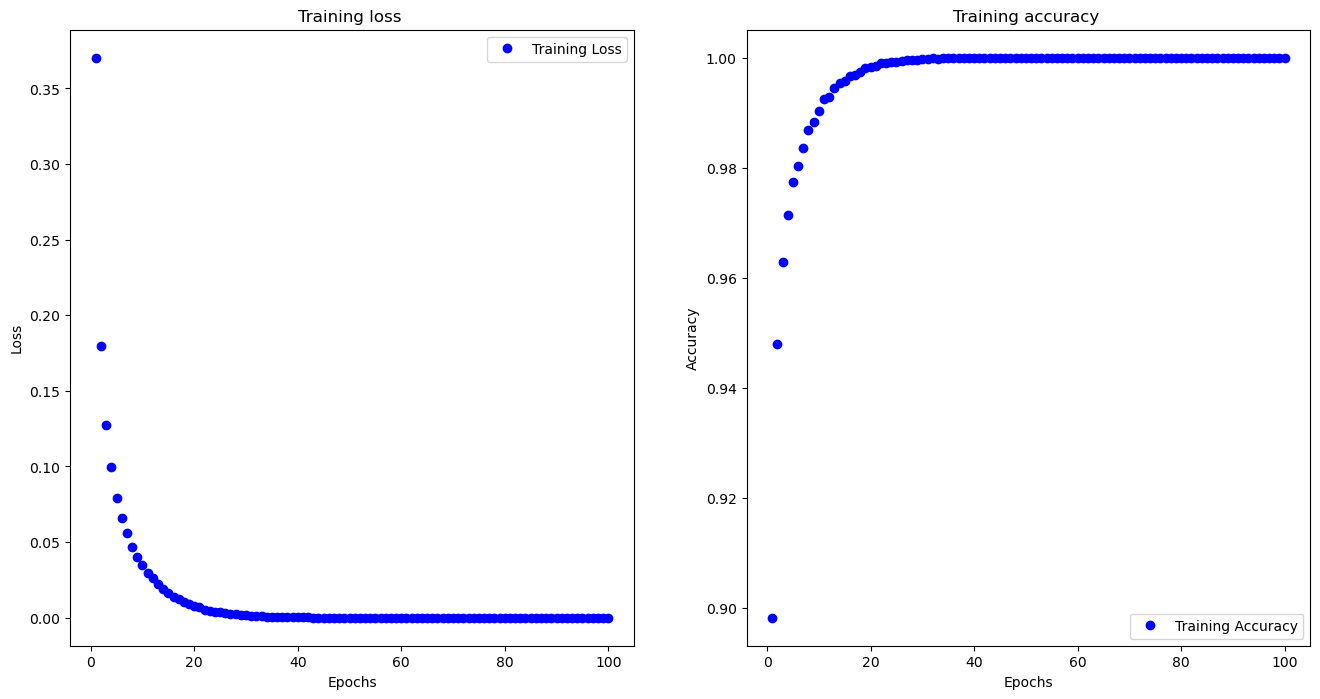

313/313 [==============================] - 2s 6ms/step - loss: 0.1964 - accuracy: 0.9812
accuracy on test set : 0.9811999797821045


In [39]:
number_of_nodes = 128
epochs = 100
batch_size = 128

network2 = models.Sequential()
network2.add(layers.Dense(number_of_nodes, activation='relu', input_shape=(28*28,)))
network2.add(layers.Dense(10, activation='softmax'))

network2.compile(optimizer='rmsprop',
                loss = 'categorical_crossentropy',
                metrics =['accuracy'])

history2 = network2.fit(train_images,
                        train_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_split=0.2)

history_dict = history2.history
loss_values = history_dict['loss']
acc_values = history_dict['accuracy']
plt.rcParams['figure.figsize'] = (16,8) # Make the figures a bit bigger
fig,(ax1,ax2,) = plt.subplots(1,2)

x = range(1,epochs+1)
ax1.plot(x,loss_values,'bo',label='Training Loss')
ax1.set_title('Training loss ')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(x,acc_values,'bo',label='Training Accuracy')
ax2.set_title('Training accuracy ')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

test_loss, test_acc = network2.evaluate(test_images,test_labels)
print('accuracy on test set : {}'.format(test_acc))